<a href="https://colab.research.google.com/github/ruhaan0001/CognitiveComputing/blob/main/ass7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. You are a data analyst at an e-commerce company. Your task is to analyze sales data,
clean and process it, perform staƟsƟcal analysis, and generate visual insights to help the
business make informed decisions.
1. Use your roll number as the random seed to generate unique data for each student.
2. Follow the quesƟons step by step, as each part builds upon the previous one.
3. Submit the assignment as a Jupyter Notebook (.ipynb) with:
 Well-documented code and clear comments.
 Markdown explanaƟons for each step.
 Screenshots of the plots and outputs.
Part I: Randomized Sales Data GeneraƟon (NumPy)
1. IniƟalize Random Seed
2. Generate Sales Data
 Create a NumPy array of random sales data for 12 months (shape = (12, 4)),
where each column represents a product category:
 Electronics, Clothing, Home & Kitchen, Sports.
 Sales values should be between 1000 and 5000 units per month.
 The range should be randomized using the seed.
3. Convert to DataFrame
 Convert the cleaned NumPy array into a Pandas DataFrame with:
i. Columns: Electronics, Clothing, Home & Kitchen, Sports
ii. Index: Months from Jan to Dec
Part II: Data ManipulaƟon and Analysis (Pandas)
1. Display the first 5 rows and summary staƟsƟcs of the DataFrame.
2. Calculate the total sales per category and total sales per month.
3. Calculate the average sales growth between consecuƟve months for each category.
4. Add the following columns to the DataFrame:
 Total Sales: Sum of all categories per month.
 Growth Rate: Percentage change in Total Sales from the previous month.
5. Apply a randomized discount:
 If your roll number is even, apply a 10% discount to the Electronics category.
 If odd, apply a 15% discount to the Clothing category.
Part III: VisualizaƟons (Matplotlib and Seaborn)
1. Plot monthly sales trends for each category using line plots.
2. Create the following plots:
 Box plots to show the sales distribuƟon for each category

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
roll_number = int(input("Enter your roll number as seed: "))
np.random.seed(roll_number) # setting random seed

# Generate a 12x4 matrix (12 months and 4 categories)
sales_data = np.random.randint(1000,5000, size = (12,4))
# Convert to Pandas DataFrame
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
categories = ['Electronics','Clothing','Home & Kitchen','Sports']

df = pd.DataFrame(sales_data, columns = categories, index = months)
print('Initial sales_data: ')
df.head()

Enter your roll number as seed: 782
Initial sales_data: 


,Electronics,Clothing,Home & Kitchen,Sports
Jan,4594,4056,1278,2616
Feb,2817,4955,1883,2987
Mar,4411,4757,1489,4689
Apr,2781,4845,2894,3424
May,3926,4940,2015,1035


In [2]:
df.head()

,Electronics,Clothing,Home & Kitchen,Sports
Jan,4594,4056,1278,2616
Feb,2817,4955,1883,2987
Mar,4411,4757,1489,4689
Apr,2781,4845,2894,3424
May,3926,4940,2015,1035


In [3]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))




We have 4 numerical features : ['Electronics', 'Clothing', 'Home & Kitchen', 'Sports']

We have 0 categorical features : []


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, Jan to Dec
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Electronics     12 non-null     int64
 1   Clothing        12 non-null     int64
 2   Home & Kitchen  12 non-null     int64
 3   Sports          12 non-null     int64
dtypes: int64(4)
memory usage: 780.0+ bytes


In [5]:
df.isna().sum()


,0
Electronics,0
Clothing,0
Home & Kitchen,0
Sports,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
print('Summary Statistics: ')
df.describe()

Summary Statistics: 


,Electronics,Clothing,Home & Kitchen,Sports
count,12.000000,12.000000,12.000000,12.000000
mean,2912.083333,3928.083333,2198.500000,3079.166667
std,1151.097536,1038.833564,1044.457885,1309.386729
min,1103.000000,1761.000000,1150.000000,1035.000000
25%,2366.250000,3639.500000,1432.500000,2059.500000
50%,2845.000000,4091.500000,1933.500000,3205.500000
75%,3646.250000,4779.000000,2930.750000,4309.750000
max,4594.000000,4955.000000,4152.000000,4761.000000


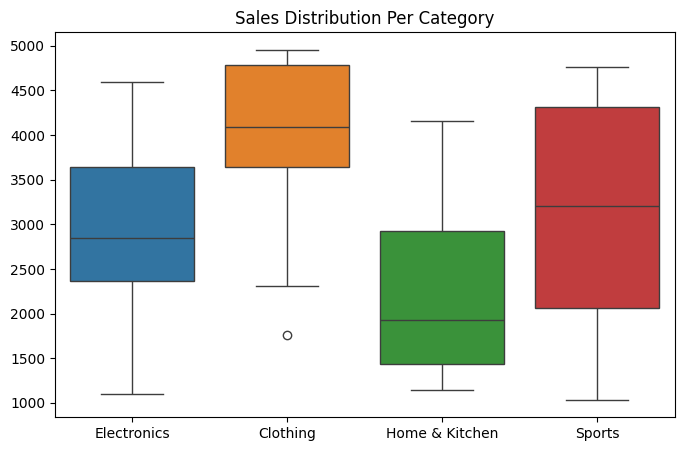

In [8]:
# Box Plot - Sales Distribution
plt.figure(figsize=(8,5))
sns.boxplot(data=df[categories])
plt.title("Sales Distribution Per Category")
plt.show()


In [9]:
total_sales_per_category = df[categories].sum()
print("Total sales per category: \n", total_sales_per_category)


Total sales per category: 
 Electronics       34945
Clothing          47137
Home & Kitchen    26382
Sports            36950
dtype: int64


In [10]:
df["Total Sales"] = df.sum(axis=1)
print("Total Sales per Month:\n", df["Total Sales"])


Total Sales per Month:
 Jan    12544
Feb    12642
Mar    15346
Apr    13944
May    11916
Jun    13053
Jul    11644
Aug     9175
Sep    10817
Oct     9613
Nov    12436
Dec    12284
Name: Total Sales, dtype: int64


In [11]:
df["Growth Rate"] = df["Total Sales"].pct_change() * 100
df["Growth Rate"].fillna(0, inplace=True)  # Fill NaN with 0


In [12]:
# Apply Randomized Discount
if roll_number % 2 == 0:
    df["Electronics"] *= 0.90  # 10% discount
else:
    df["Clothing"] *= 0.85  # 15% discount


In [13]:
print("Data After Discount:")
df.head()

Data After Discount:


,Electronics,Clothing,Home & Kitchen,Sports,Total Sales,Growth Rate
Jan,4134.6,4056,1278,2616,12544,0.000000
Feb,2535.3,4955,1883,2987,12642,0.781250
Mar,3969.9,4757,1489,4689,15346,21.389021
Apr,2502.9,4845,2894,3424,13944,-9.135931
May,3533.4,4940,2015,1035,11916,-14.543890


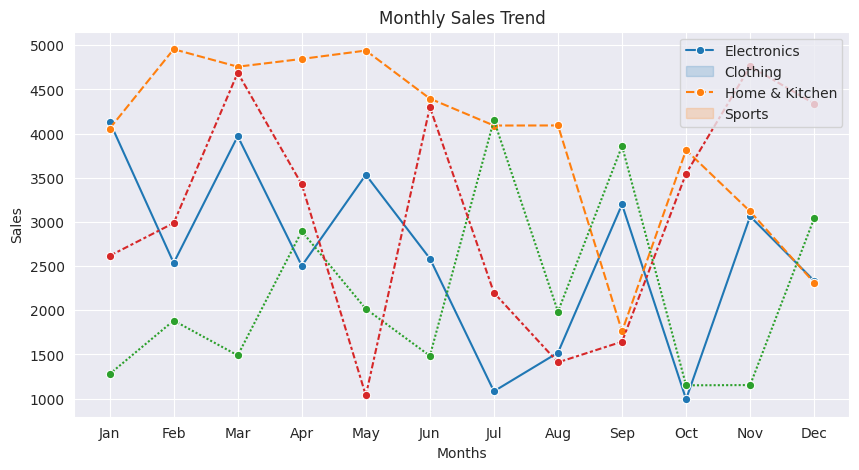

In [14]:
sns.set_style("darkgrid")

# Line Plot - Monthly Sales Trend
plt.figure(figsize=(10,5))
sns.lineplot(data=df[categories], marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.legend(categories)
plt.show()



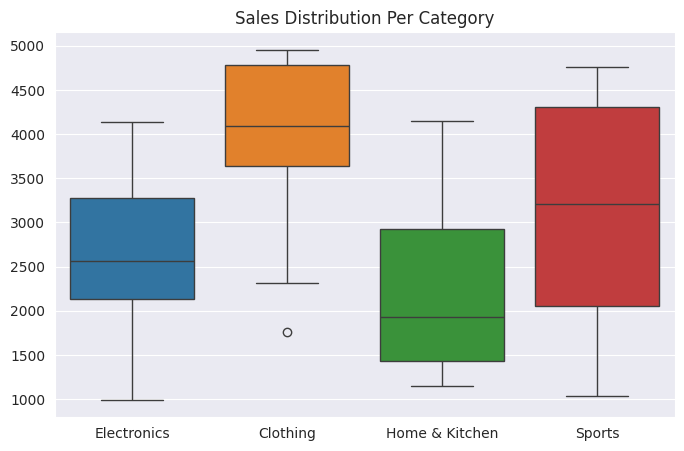

<Figure size 640x480 with 0 Axes>

In [15]:
# Box Plot - Sales Distribution
plt.figure(figsize=(8,5))
sns.boxplot(data=df[categories])
plt.title("Sales Distribution Per Category")
plt.show()
plt.savefig('Sales Distribution per Category.png')

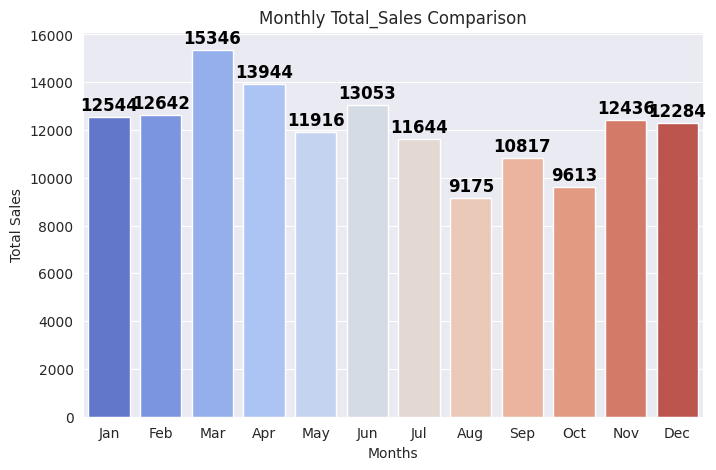

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=df.index, y=df["Total Sales"], palette="coolwarm")

for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width() / 2,  # X-position → Bar ka center
            bar.get_height() + 100,             # Y-position → Bar ke thoda upar
            f"{int(bar.get_height())}",         # Sales value as label
            ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.title('Monthly Total_Sales Comparison')
plt.show()
plt.savefig('Total_sales barplot.png')

In [17]:
best_month = df["Total Sales"].idxmax()
worst_month = df["Total Sales"].idxmin()

print(f"Best Sales Month: {best_month} with {df.loc[best_month, 'Total Sales']} sales.")
print(f"Worst Sales Month: {worst_month} with {df.loc[worst_month, 'Total Sales']} sales.")



Best Sales Month: Mar with 15346 sales.
Worst Sales Month: Aug with 9175 sales.


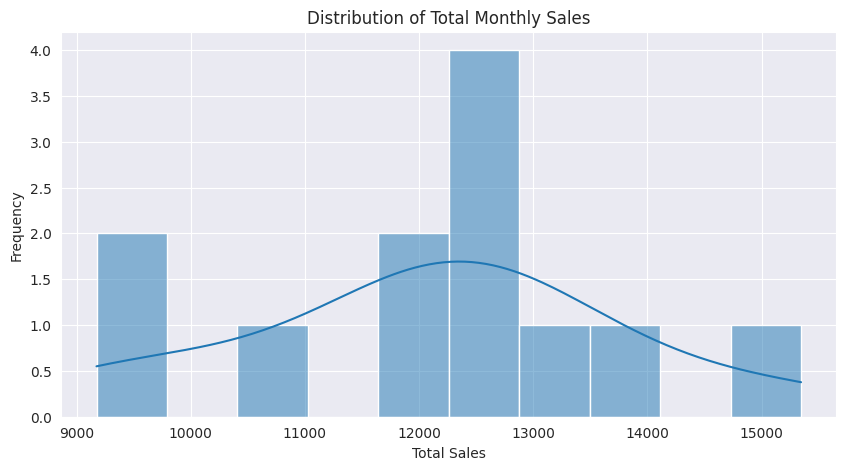

In [18]:
# Distribution Check (Histogram & KDE)
plt.figure(figsize=(10,5))
sns.histplot(df["Total Sales"], kde = True, bins = 10)
plt.title("Distribution of Total Monthly Sales")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()


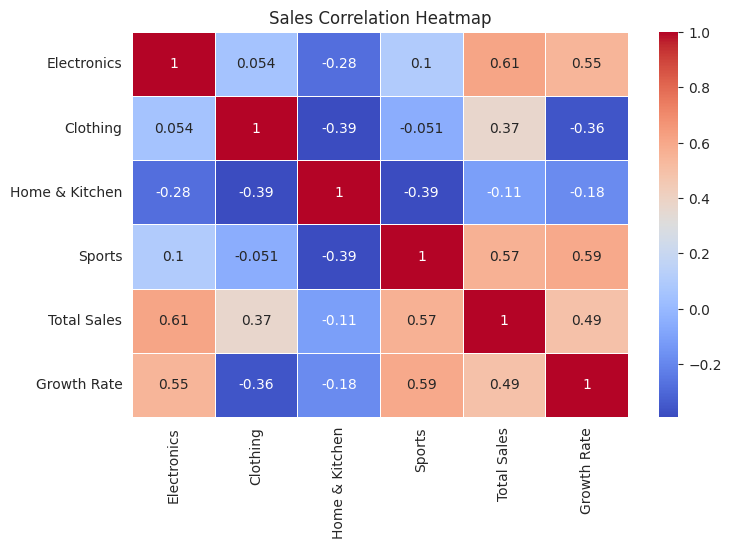

In [19]:
# Correlation Heatmap
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Sales Correlation Heatmap")
plt.show()


Q.2 For the array: array = np.array([[1, -2, 3],[-4, 5, -6]])
 i. Find element-wise absolute value
ii. Find the 25th, 50th, and 75th percenƟle of flaƩened array, for each column, for each
row.
iii. Mean, Median and Standard DeviaƟon of flaƩened array, of each column, and
each row


In [20]:
import numpy as np

# Define the array
array = np.array([[1, -2, 3], [-4, 5, -6]])

# i. Element-wise absolute value
abs_array = np.abs(array)

# ii. Percentiles (flattened, column-wise, row-wise)
percentiles_flattened  = np.percentile(array, [25, 50, 75])
percentiles_columnwise = np.percentile(array, [25, 50, 75], axis=0)
percentiles_rowwise    = np.percentile(array, [25, 50, 75], axis=1)

# iii. Mean, Median, Standard Deviation (flattened, column-wise, row-wise)
mean_flattened   = np.mean(array)
median_flattened = np.median(array)
std_flattened    = np.std(array)

mean_columnwise   = np.mean(array, axis=0)
median_columnwise = np.median(array, axis=0)
std_columnwise    = np.std(array, axis=0)

mean_rowwise      = np.mean(array, axis=1)
median_rowwise    = np.median(array, axis=1)
std_rowwise       = np.std(array, axis=1)

# Printing results
print("Element-wise Absolute Value:\n", abs_array)
print("\nPercentiles:\n")
print("\nFlattened:\n",   percentiles_flattened)
print("\nColumn-wise:\n", percentiles_columnwise)
print("\nRow-wise:\n",    percentiles_rowwise)
print()
print("Mean    (Flattened):", mean_flattened)
print("Median  (Flattened):", median_flattened)
print("Std_Dev (Flattened):", std_flattened)
print()
print("Mean    (Column-wise):", mean_columnwise)
print("Median  (Column-wise):", median_columnwise)
print("Std_Dev (Column-wise):", std_columnwise)
print()
print("Mean    (Row-wise):", mean_rowwise)
print("Median  (Row-wise):", median_rowwise)
print("Std_Dev (Row-wise):", std_rowwise)


Element-wise Absolute Value:
 [[1 2 3]
 [4 5 6]]

Percentiles:


Flattened:
 [-3.5 -0.5  2.5]

Column-wise:
 [[-2.75 -0.25 -3.75]
 [-1.5   1.5  -1.5 ]
 [-0.25  3.25  0.75]]

Row-wise:
 [[-0.5 -5. ]
 [ 1.  -4. ]
 [ 2.   0.5]]

Mean    (Flattened): -0.5
Median  (Flattened): -0.5
Std_Dev (Flattened): 3.8622100754188224

Mean    (Column-wise): [-1.5  1.5 -1.5]
Median  (Column-wise): [-1.5  1.5 -1.5]
Std_Dev (Column-wise): [2.5 3.5 4.5]

Mean    (Row-wise): [ 0.66666667 -1.66666667]
Median  (Row-wise): [ 1. -4.]
Std_Dev (Row-wise): [2.05480467 4.78423336]


Q.3 For the array: a = np.array([-1.8, -1.6, -0.5, 0.5,1.6, 1.8, 3.0]).
 i. Find floor, ceiling and truncated value, rounded

In [21]:
a = np.array([-1.8, -1.6, -0.5, 0.5, 1.6, 1.8, 3.0])

print("\nFloor  :", np.floor(a))
print("Ceil   :", np.ceil(a))
print("Trunc  :", np.trunc(a))
print("Round  :", np.round(a))


Floor  : [-2. -2. -1.  0.  1.  1.  3.]
Ceil   : [-1. -1. -0.  1.  2.  2.  3.]
Trunc  : [-1. -1. -0.  0.  1.  1.  3.]
Round  : [-2. -2. -0.  0.  2.  2.  3.]


Q.4 WAP to swap two elements in a list in Python Using a Temporary Variable.

In [22]:
def swap_list_elements(lst, i, j):
    lst[i], lst[j] = lst[j], lst[i]
    return lst

# Example Usage:
lst = [1, 2, 3, 4, 5]
print("Original List :", lst)
swapped_list = swap_list_elements(lst, 1, 3)  # Swap index 1 and 3
print("Swapped List  :", swapped_list)


Original List : [1, 2, 3, 4, 5]
Swapped List  : [1, 4, 3, 2, 5]


Q.5 Write a Python program to swap two elements in a set by converƟng it to a list first.

In [23]:
def swap_set_elements(s, i, j):
    s = list(s)
    s[i], s[j] = s[j], s[i]
    return set(s)

# Example Usage:
s = {10, 20, 30, 40, 50}
print("Original Set:", s)
swapped_set = swap_set_elements(s, 0, 2)  # Swap first and third element
print("Swapped Set :", swapped_set)


Original Set: {50, 20, 40, 10, 30}
Swapped Set : {40, 10, 50, 20, 30}
